# Análisis de datos de accidentes de tráfico

### Importamos las librerías necesarias 



In [71]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Fallecidos por año

### Leemos el excel descargado en la carpeta /dat "Series-1993-2016_fallecidos-30-dias.XLSX" con datos sobre el número de fallecidos a lo largo de los años y lo guardamos en un DataFrame


In [72]:
skip = 2
path = 'dat/Series-1993-2016_fallecidos-30-dias.XLSX'
df_fallecidos = pd.read_excel(path, skiprows=skip, sheetname='M_I-U_Meses')

### Obtenemos las columnas que nos interesan "Años" y "Total" y les damos nombre


In [73]:
df_anio_total_fallecidos = df_fallecidos.iloc[:,[0,13]]
df_anio_total_fallecidos.columns = ['annio_fall', 'total_fall']

### Mostramos los datos del dataframe en un gráfico


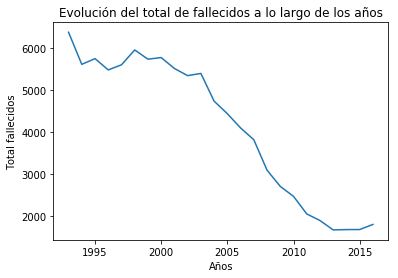

In [78]:
x = df_anio_total_fallecidos['annio_fall']
y = df_anio_total_fallecidos['total_fall']

plt.xlabel('Años')
plt.ylabel('Total fallecidos')
plt.title('Evolución del total de fallecidos a lo largo de los años')
plt.plot(x,y)
plt.show()


### Vemos que el número de fallecidos ha ido descendiendo desde 1993 hasta 2015, año en el que se puede percibir un aumento.


## 2. Fallecidos por cada millón de vehículos

### Leemos el excel descargado en la carpeta /dat con nombre "series_parque_2016.xlsx" que contiene información sobre la cantidad de vehículos  y lo guardamos en un DataFrame

Leemos desde la línea 5 para comenzar en el año 1993 que es el primer año del que disponemos de datos de los fallecidos por año

In [75]:
skip = 5
path = 'dat/series_parque_2016.xlsx'
df_parque = pd.read_excel(path, skiprows=skip, sheetname='parque_tipos')

### Obtenemos las columnas que nos interesan "Años" y "Total" y les damos nombre

In [76]:
df_anio_total_parque = df_parque.iloc[:,[0,8]]
df_anio_total_parque.columns = ['annio_parque', 'total_parque']

### Cruzamos los dos dataframes, el de los datos de fallecimientos y el del parque móvil.

In [81]:
df_union = pd.merge(left=df_anio_total_fallecidos, right=df_anio_total_parque, on = None, left_on='annio_fall', 
                    right_on='annio_parque')

### Calculamos una nueva columna con el ratio de fallecidos por cada millón de vehículos.

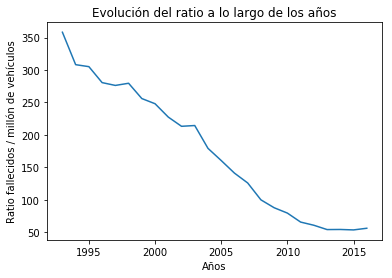

In [89]:
df_union['ratio'] = 1000000 * df_union['total_fall']/df_union['total_parque']

x = df_union['annio_fall']
y = df_union['ratio']

plt.xlabel('Años')
plt.ylabel('Ratio fallecidos / millón de vehículos')
plt.title('Evolución del ratio a lo largo de los años')
plt.plot(x,y)
plt.show()


### El ratio de fallecidos por millón de vehículos a lo largo de los años tiene una evolución muy similar a la del gráfico anterior (fallecidos por año). Por lo que deduzco que, efectivamente, han aumentado los fallecidos desde 2015.